In [190]:
import pandas as k
data=k.read_csv("Copy of Dataset IoV.csv")
data.sample(8)

,Number of Lanes,Status of driver,Nature of environment,Velocity of vehicle,Distance between vehicles,Breaking capability,Collussion
54622,2,1,1,0.35,0.0,0,0
92839,1,2,1,0.35,0.0,1,1
75048,2,2,2,0.35,1.0,0,1
116295,2,1,1,0.65,0.0,0,0
38455,2,1,1,0.65,0.0,0,0
201764,2,1,1,0.65,0.0,0,0
95496,2,2,2,0.35,1.0,0,1
11018,2,2,2,0.35,1.0,0,1


# Multiple Linear Regression

In [191]:
import pandas as k
import numpy as np
from matplotlib import pyplot as py
import seaborn as sn

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206775 entries, 0 to 206774
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Number of Lanes            206775 non-null  int64  
 1   Status of driver           206775 non-null  int64  
 2   Nature of environment      206775 non-null  int64  
 3   Velocity of vehicle        206775 non-null  float64
 4   Distance between vehicles  206775 non-null  float64
 5   Breaking capability        206775 non-null  int64  
 6   Collussion                 206775 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 11.0 MB


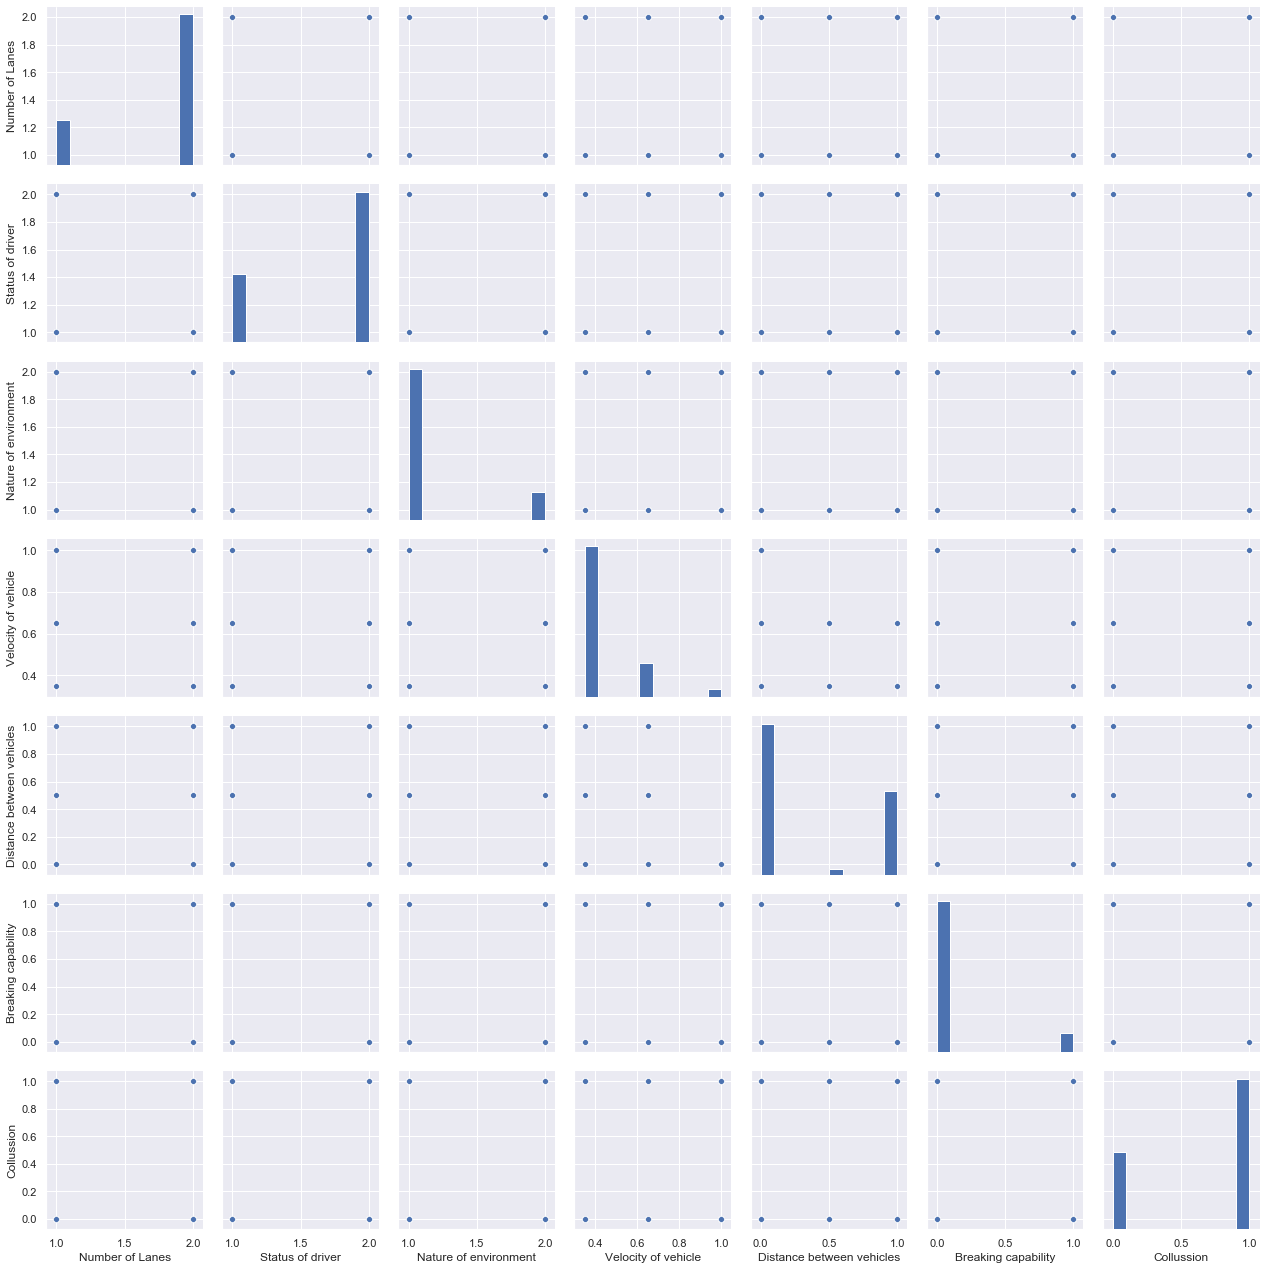

In [193]:
sn.pairplot(data)

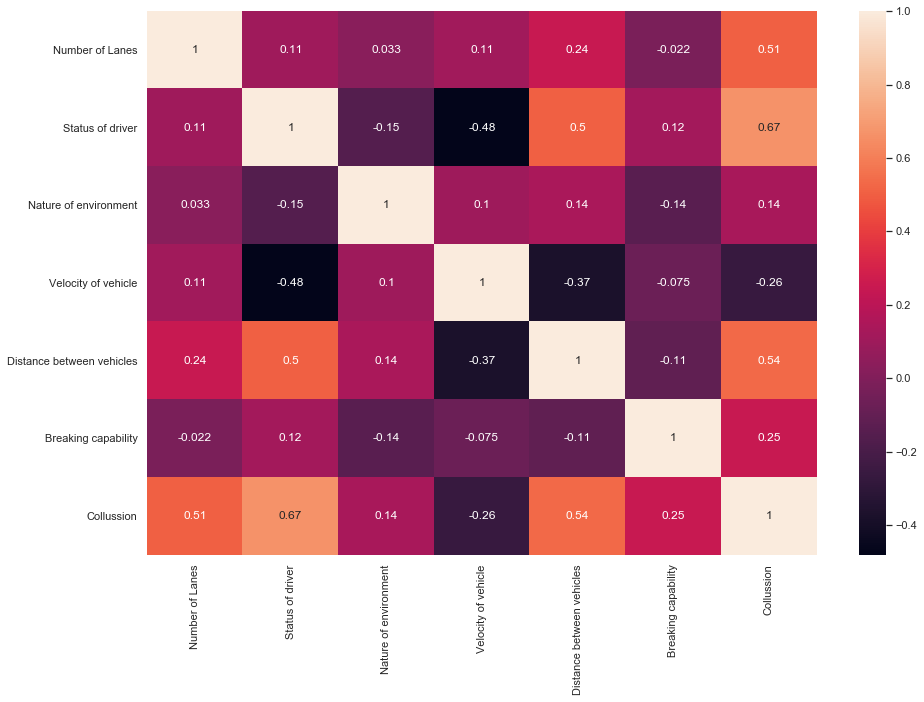

In [195]:
corr=data.corr()
py.figure(figsize=(15,10))
sn.heatmap(corr,annot=True)

In [203]:
x=["Number of Lanes","Status of driver","Velocity of vehicle","Nature of environment","Breaking capability"]
y=["Collussion"]
X=data[x]
Y=data[y]

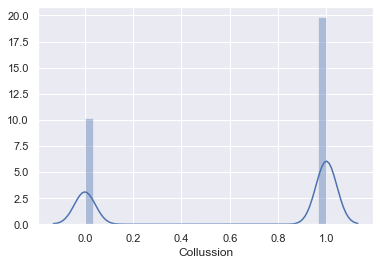

In [204]:
#visualize numerical attributes
sn.distplot(data['Collussion'])

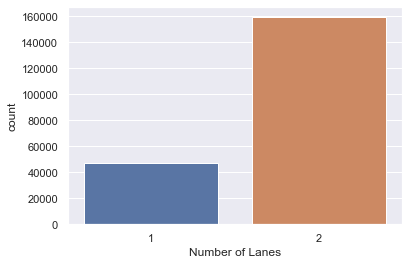

In [205]:
sn.countplot(data["Number of Lanes"])

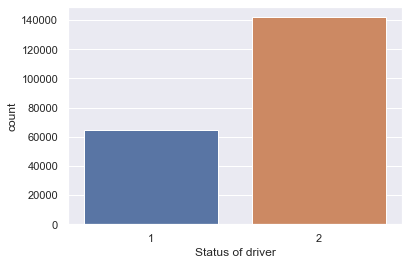

In [206]:
sn.countplot(data["Status of driver"])

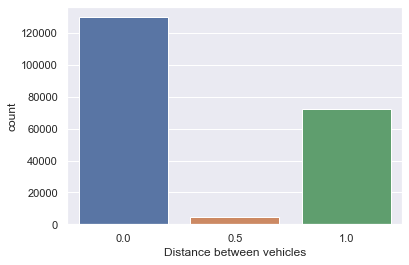

In [207]:
sn.countplot(data["Distance between vehicles"])

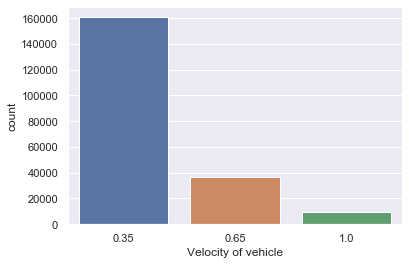

In [209]:
sn.countplot(data["Velocity of vehicle"])

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [117]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [118]:
y_pred=regressor.predict(X_test)
print(y_pred)

[[-0.23795906]
 [ 0.89127733]
 [ 0.25794931]
 ...
 [ 0.2392664 ]
 [-0.23795906]
 [ 0.72097682]]


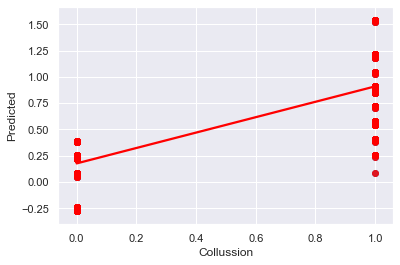

In [119]:
py.scatter(y_test,y_pred);
py.xlabel('Actual');
py.ylabel('Predicted');

sn.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score,precision_score
accuracy = r2_score(y_test, y_pred)*100
print('Testing Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Testing Accuracy of our model is equal 70.43 %.


# KNN

In [142]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [143]:
data1=k.read_csv("Copy of Dataset IoV.csv")
data1.sample(8)

,Number of Lanes,Status of driver,Nature of environment,Velocity of vehicle,Distance between vehicles,Breaking capability,Collussion
61947,1,2,1,0.35,0.0,1,1
97268,2,2,1,0.35,1.0,0,1
86201,1,2,1,0.35,1.0,0,1
175877,2,1,1,0.35,0.0,0,0
63218,1,2,1,0.35,1.0,0,1
99868,2,2,1,0.35,0.0,0,1
200412,2,1,1,0.65,0.0,0,0
174907,2,2,2,0.35,1.0,0,1


In [175]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206775 entries, 0 to 206774
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Number of Lanes            206775 non-null  int64  
 1   Status of driver           206775 non-null  int64  
 2   Nature of environment      206775 non-null  int64  
 3   Velocity of vehicle        206775 non-null  float64
 4   Distance between vehicles  206775 non-null  float64
 5   Breaking capability        206775 non-null  int64  
 6   Collussion                 206775 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 11.0 MB


In [144]:
X=data1[['Status of driver',"Nature of environment","Velocity of vehicle"]]
Y=data["Collussion"]
Y=pd.get_dummies(Y,drop_first=True)


In [145]:
#Traiing and Testing Data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1)
KNN=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
KNN.fit(X_train,Y_train)
Y_Pred=KNN.predict(X_test)

C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([[12618,  4971],
       [ 1204, 32901]], dtype=int64)

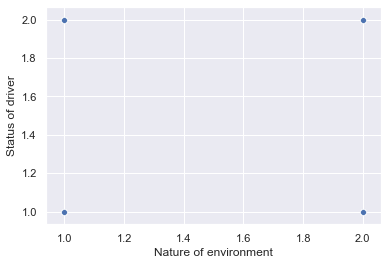

In [146]:
sn.scatterplot(x=data1['Nature of environment'],y=data1['Status of driver'],data=X_test.join(Y_test,how='outer'))
confusion_matrix(Y_test,Y_Pred)

In [147]:
from sklearn.preprocessing import LabelEncoder
cols=['Status of driver','Nature of environment','Velocity of vehicle']
le=LabelEncoder()
for c in cols:
    data1[c]=le.fit_transform(data1[c])

In [148]:
def model_Test(model,x,y_test):
    model = model
    y_pred = model.predict(x)

    from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score,precision_score
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm,annot=True)

    accuracy = accuracy_score(y_test, y_pred)*100
    print('Testing Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

    recall = recall_score(y_test, y_pred, labels=[1,2], average='micro')
    print('Recall: %.3f' % recall)

    precision = precision_score(y_test, y_pred, labels=[1,2], average='micro')
    print('Precision: %.3f' % precision)

    score = f1_score(y_test, y_pred, labels=[1,2], average='micro')
    print('F1-Measure: %.3f' % score)

Testing Accuracy of our model is equal 88.05 %.
Recall: 0.965
Precision: 0.869
F1-Measure: 0.914


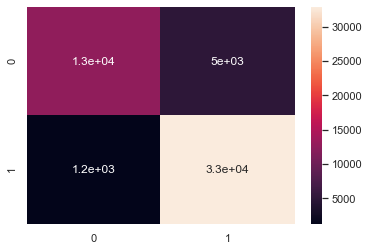

In [149]:
model_Test(KNN,X_test,Y_test)

# Decision Tree

In [150]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [151]:
data1=k.read_csv("Copy of Dataset IoV.csv")
data1.sample(8)

,Number of Lanes,Status of driver,Nature of environment,Velocity of vehicle,Distance between vehicles,Breaking capability,Collussion
171894,2,2,1,0.35,0.0,0,1
119846,1,1,1,0.35,0.0,0,0
194962,2,1,1,0.65,0.0,0,0
194641,1,2,1,0.35,0.0,0,0
105616,2,2,1,0.35,1.0,0,1
35490,2,2,1,0.35,1.0,0,1
159538,2,2,1,0.35,1.0,0,1
164019,1,2,1,0.35,0.0,0,0


In [174]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206775 entries, 0 to 206774
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Number of Lanes            206775 non-null  int64  
 1   Status of driver           206775 non-null  int64  
 2   Nature of environment      206775 non-null  int64  
 3   Velocity of vehicle        206775 non-null  float64
 4   Distance between vehicles  206775 non-null  float64
 5   Breaking capability        206775 non-null  int64  
 6   Collussion                 206775 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 11.0 MB


In [152]:
from sklearn.preprocessing import LabelEncoder
cols=['Status of driver','Nature of environment','Velocity of vehicle',"Distance between vehicles","Distance between vehicles","Breaking capability","Collussion"]
le=LabelEncoder()
for c in cols:
    data1[c]=le.fit_transform(data1[c])

In [159]:
X=data1[['Status of driver','Nature of environment','Velocity of vehicle']]
Y=data1["Collussion"]

In [160]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)
model=DecisionTreeClassifier(criterion='gini',max_depth=4)
model.fit(x_train,y_train)

Y_pred=model.predict(x_test)

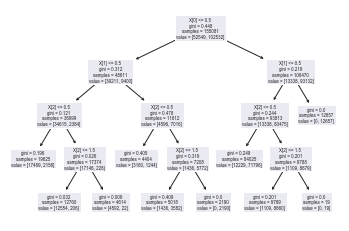

In [161]:
from sklearn import tree
tree.plot_tree(model)
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [162]:
def model_Test(model,x,y_test):
    model = model
    y_pred = model.predict(x)

    from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score,precision_score
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm,annot=True)

    accuracy = accuracy_score(y_test, y_pred)*100
    print('Testing Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

    recall = recall_score(y_test, y_pred, labels=[1,2], average='micro')
    print('Recall: %.3f' % recall)

    precision = precision_score(y_test, y_pred, labels=[1,2], average='micro')
    print('Precision: %.3f' % precision)

    score = f1_score(y_test, y_pred, labels=[1,2], average='micro')
    print('F1-Measure: %.3f' % score)

Testing Accuracy of our model is equal 65.97 %.
Recall: 1.000
Precision: 0.660
F1-Measure: 0.795


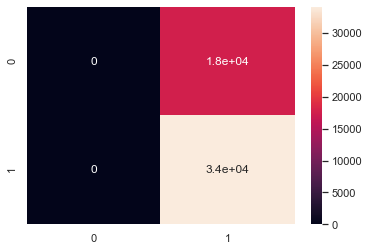

In [163]:
model_Test(model,X_test,Y_test)

# Naive Bayes

In [168]:
import pandas as k
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [170]:
data1=k.read_csv("Copy of Dataset IoV.csv")
data1.sample(5)

,Number of Lanes,Status of driver,Nature of environment,Velocity of vehicle,Distance between vehicles,Breaking capability,Collussion
158042,2,2,1,0.35,1.0,0,1
55736,1,1,2,0.35,0.0,0,0
44028,2,2,1,0.35,1.0,0,1
11423,2,2,1,0.35,1.0,0,1
58434,2,2,1,0.35,0.0,0,1


In [181]:
X=data1[['Status of driver',"Nature of environment","Velocity of vehicle","Distance between vehicles"]]
Y=data1["Collussion"]

In [182]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206775 entries, 0 to 206774
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Number of Lanes            206775 non-null  int64  
 1   Status of driver           206775 non-null  int64  
 2   Nature of environment      206775 non-null  int64  
 3   Velocity of vehicle        206775 non-null  float64
 4   Distance between vehicles  206775 non-null  float64
 5   Breaking capability        206775 non-null  int64  
 6   Collussion                 206775 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 11.0 MB


In [237]:
from sklearn.naive_bayes import GaussianNB
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)

In [239]:
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(len(x_train))

124065


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [240]:
def model_Test(model,x,y_test):
    model = model
    y_pred = model.predict(x)

    from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score,precision_score
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm,annot=True)

    accuracy = accuracy_score(y_test, y_pred)*100
    print('Testing Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

    recall = recall_score(y_test, y_pred, labels=[1,2], average='micro')
    print('Recall: %.3f' % recall)

    precision = precision_score(y_test, y_pred, labels=[1,2], average='micro')
    print('Precision: %.3f' % precision)

    score = f1_score(y_test, y_pred, labels=[1,2], average='micro')
    print('F1-Measure: %.3f' % score)

Testing Accuracy of our model is equal 93.11 %.
Recall: 0.898
Precision: 0.998
F1-Measure: 0.945


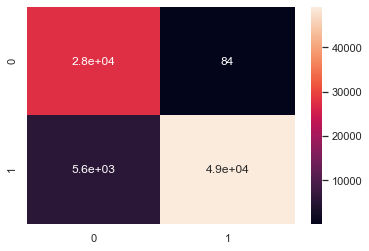

In [241]:
model_Test(model,x_test,y_test)

In [251]:
data4=model.predict(x_train)
data5=model.predict(x_test)
data6=list(data4)+list(data5)
data1["High_Risk_Area"]=data6

In [259]:
data1.sample(10)

,Number of Lanes,Status of driver,Nature of environment,Velocity of vehicle,Distance between vehicles,Breaking capability,Collussion,High_Risk_Area
162106,1,1,1,0.35,0.0,0,0,1
100570,2,2,1,0.65,0.0,1,1,1
91618,2,2,1,0.35,1.0,0,1,0
71968,2,1,1,0.35,0.0,0,0,1
116285,2,2,1,0.35,1.0,0,1,1
31811,2,1,1,0.35,0.0,0,0,1
10635,1,1,1,0.35,0.0,0,0,1
106183,2,2,2,0.35,1.0,0,1,1
3769,1,1,2,0.65,0.0,0,0,1
124240,1,2,1,0.35,0.5,1,1,0


In [262]:
new=pd.read_excel("C:\\Users\\Windows 10\\Documents\\Data Sets\\Dataset IoV.xlsx")

In [263]:
new["High_Risk_Area"]=data6


In [264]:
new.to_excel("C:\\Users\\Windows 10\\Documents\\Data Sets\\Dataset IoV.xlsx")